University of Helsinki, Master's Programme in Data Science  
DATA20046 Neural Networks and Deep Learning - Spring 2025  
Arto Klami, Aapo Hyvärinen  

# Problem Set 2: Neural network optimization and generalization

## Mathematical Exercises

1. We can look at the automatic differentiation algorithm as a graph in which nodes represent the intermediate values computed in the forward pass and edges represent the partial derivatives of the children w.r.t the parent $$\frac{\partial child}{\partial parent}$$ Once we know the final value of the forward pass we can update the values of the nodes with the backward pass using the following formula $$\bar{u} = \sum_{v \in \text{children}(u)} \bar{v} \cdot \frac{\partial v}{\partial u}$$ where:
	- $\bar{v} = \frac{\partial f}{\partial v}$ is the backward pass result up to node v (note: the very first result is always 1),
	- $\frac{\partial v}{\partial u}$ is the local partial derivative from $u \to v$,
	- In summary, because of $\frac{\partial v}{\partial u}$ we need the intermediate derivative expressions and node values of the forward pass


<div style="display: flex; justify-content: space-between; align-items: flex-start; gap: 10px;">
  <img src="forward.drawio.png" alt="Forward" style="width: 100%; height: auto;" />
  <img src="backward.drawio.png" alt="Backward" style="width: 100%; height: auto;" />
</div>

## Computer Assignments

### Problem 1

Setting up the enrivonment and loading the data. No need to change this part.

In [1]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

# Load tensors from the file
loaded_tensors = torch.load('exercise_2_problem_1_data.pth')
X_tensor = loaded_tensors['X_tensor']
Y_tensor = loaded_tensors['Y_tensor']
dataset = TensorDataset(X_tensor, Y_tensor)

#### a) Model definition

Finalize the model definition as instructed in the exercise sheet.

In [2]:
class RegressionModel(nn.Module):
	def __init__(self, input_dim, output_dim):
		super().__init__()
		self.layers = nn.Sequential(
			# TODO
			nn.Linear(input_dim, 400, bias = False)
			,nn.ReLU()
			,nn.Linear(400, 200, bias = False)
			,nn.ReLU()
			,nn.Linear(200, 100, bias = False)
			,nn.ReLU()
			,nn.Linear(100, output_dim, bias = False)
		)

	def forward(self, x):
		return self.layers(x)

#### b) Write optimization loop

You can use any optimizer you want, but remember to set all the hyperparameters it requires, including the batch size and number of iterations etc that are defined outside the optimizer function.

In [ ]:
# Helper for retrieving minibatches of desired size
batch_size = 20 # You choose this!
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


model = RegressionModel(100, 2)
criterion = nn.MSELoss()
lr = 0.0008 # TODO
optimizer = torch.optim.SGD(model.parameters(), lr = lr) # TODO

num_epochs = 5000 # TODO
printing_interval = num_epochs // 10 # Avoid printing hundreds or thousands of losses, to keep the notebook cleaner
losses_ = []

model.train()
# TODO: Define loop over epochs 
for epoch in range(num_epochs):
	running_loss = 0.0
	# TODO: Define loop over batches
	for batch, (X, y) in enumerate(dataloader):
	
		# 1) TODO: Zero the gradients
		optimizer.zero_grad()
		# 2) TODO: Forward pass
		pred = model(X)
		# 3) TODO: Compute loss (MSE)
		loss = criterion(pred, y)
		# 4) TODO: Backprop
		loss.backward()
		# 5) TODO: Update parameters
		optimizer.step()

		running_loss += loss.item()

	avg_loss = running_loss / len(dataloader)
	losses_.append(avg_loss)

	if(epoch % printing_interval == 1):
		print(f"Epoch [{epoch+1}/{num_epochs}] - MSE Loss: {avg_loss:.6f}")

Epoch [2/5000] - MSE Loss: 1.012817
Epoch [502/5000] - MSE Loss: 0.042497
Epoch [1002/5000] - MSE Loss: 0.003724
Epoch [1502/5000] - MSE Loss: 0.000469
Epoch [2002/5000] - MSE Loss: 0.000073
Epoch [2502/5000] - MSE Loss: 0.000014
Epoch [3002/5000] - MSE Loss: 0.000003
Epoch [3502/5000] - MSE Loss: 0.000001
Epoch [4002/5000] - MSE Loss: 0.000000
Epoch [4502/5000] - MSE Loss: 0.000000


#### d) Computing the gradient norms

Practice extracting information about a trained model, by computing the gradient norms that were used to analyse SGD behavior during the lectures. No need to do anything with the gradient norms, just show that you can compute them.

In [18]:
# Switch to evaluation mode -- we are no longer training!
model.eval()

grad_norms = []  # to store gradient norms for each batch

# TODO: Define loop over batches
for batch, (X, y) in enumerate(dataloader):

	# Compute squared L2 norm across all model parameter gradients
	# Hints:
	# - You again need to first evaluate the gradient of the loss wrt to the model parameters
	# - You can extract a list of all model parameters with model.parameters()
	# - For each parameter p in model.parameters(), you can access the gradient with p.grad
	batch_size = X.shape[0]
	batch_norms = []

	# Compute per-sample gradients
	for i in range(batch_size):
		pred_i = model(X[i].unsqueeze(0))
		loss_i = criterion(pred_i, y[i].unsqueeze(0))
		sample_grads = torch.autograd.grad(outputs = loss_i, inputs = list(model.parameters()))

		# Compute squared L2 norm of sample_i gradients
		grad_norm = sum(torch.norm(grad, p = 2) ** 2 for grad in sample_grads).item()
		batch_norms.append(grad_norm)

	# Store the average norm for this batch
	grad_norms.append(np.mean(batch_norms))

# Convert to numpy array for statistics
grad_norms = np.array(grad_norms)
mean_gn = np.mean(grad_norms) # TODO
var_gn  = np.var(grad_norms) # TODO

print("Gradient Norm stats for evaluation pass:")
print(f"  Mean  : {mean_gn:.6f}")
print(f"  Std   : {var_gn:.6f}")

Gradient Norm stats for evaluation pass:
  Mean  : 0.000009
  Std   : 0.000000


#### e) Reporting

**Edit this cell directly to write your answers.** You should print the values within the code blocks, but also copy them here for ease of grading. You can also write any other remarks you may have in this cell.

##### Optimizer settings: 

In order to train the neural network I used the following tutorial coming from the standard documentation https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html&ved=2ahUKEwiYn4DFj7SMAxWTKxAIHT9IARoQFnoECCAQAQ&usg=AOvVaw2U0s-gl9fpQq-sceRXwNdI in which the suggested optimizer was SGD so I decided to use it as well. The parameters for the optimizers are model.parameters(), learning rate set to 0.0008, batch size is set to 20, 5000 epochs.

##### Optimization speed:

I reached the loss threshold after around 4000 epochs.

##### The gradient norms:

After training the model, the gradient norm mean is 0.000009 and the variance over the batches is 0.000000.

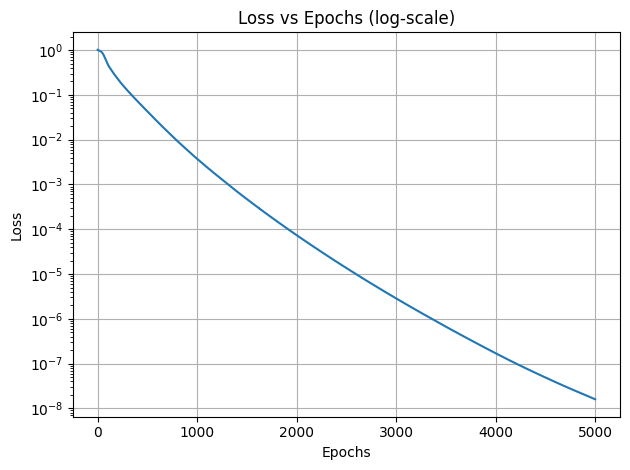

In [16]:
# Plot the loss as function of epochs, using log-scale for the y-axis
plt.plot(losses_)
plt.yscale("log")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs (log-scale)")
plt.grid()
plt.tight_layout()
plt.show()

=========

### Problem 2

#### a) Generate training/testing data

Do not change this part. The code snippet greates synthetic data by feeding random inputs through randomly initialized neural network.

In [2]:
# N samples with D inputs and O outputs
N = 100
D = 10
O = 5

# Random mapping from x to y, as small neural network
class CreationModel(nn.Module):
  def __init__(self, D, O, M):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(D, M),
      nn.Tanh(),
      nn.Linear(M, O)
    )

  def forward(self, x):
    return self.layers(x)

# For getting the same data
torch.manual_seed(78798)

# Training data
x = torch.randn(N, D)
noiselevel = 0.1
modelGenerate = CreationModel(D,O,5)
modelGenerate.eval()
y = modelGenerate(x).clone().detach() + noiselevel*torch.randn(N, O)

# Test data
N_test = 10000
x_test = torch.randn(N_test, D)
y_test = modelGenerate(x_test).clone().detach()  + noiselevel*torch.randn(N_test, O)

##### Pre-defined model

Do not change this part. The parameter $M$ controls the size/complexity of the network.

In [3]:
class RegressionModel(nn.Module):
  def __init__(self, D, O, M):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(D, M),
      nn.ReLU(),
      nn.Linear(M, M),
      nn.ReLU(),
      nn.Linear(M, O)
    )

  def forward(self, x):
    return self.layers(x)

#### b) Train model and validate the double descent principle

In [4]:
# Use full data for gradients
B = N
data_loader = DataLoader(TensorDataset(x,y), batch_size=B, shuffle=True)

# Loop over some range of M values. With these parameters logspace generates M=2 twice, so dropping the first entry
Mvalues = np.logspace(np.log10(2),np.log10(60),num=15,dtype='int')[1:]
losses = np.zeros((len(Mvalues),2))
for M_index, M in enumerate(Mvalues):
	# TODO: Define the model
	model = RegressionModel(D, O, M)
	# TODO: Train it until convergence
	model.train()
	lr = 0.009
	optimizer = torch.optim.Adam(model.parameters(), lr=lr)
	num_epochs = 5000
	printing_interval = num_epochs // 10
	criterion = nn.MSELoss()
	for epoch in range(num_epochs):
		running_loss = 0.0
		for batch, (X, target_y) in enumerate(data_loader):
			optimizer.zero_grad()
			loss = criterion(model(X), target_y)
			loss.backward()
			optimizer.step()
			running_loss += loss.item()
		avg_loss = running_loss / len(data_loader)
		if(epoch % printing_interval == 0):
			print(f"Model complexity[{M}/{Mvalues.max()}] - Epoch [{epoch+1}/{num_epochs}] - MSE Loss: {avg_loss:.6f}")
		if avg_loss < 0.0001: break
	# TODO: Evaluate both training and test error, and store them
	model.eval()
	with torch.no_grad():
		train_predictions = model(x)
		trainloss = criterion(train_predictions, y)

		test_predictions = model(x_test)
		testloss = criterion(test_predictions, y_test)
	losses[M_index,0] = trainloss.item()
	losses[M_index,1] = testloss.item()

Model complexity[2/60] - Epoch [1/5000] - MSE Loss: 0.310571
Model complexity[2/60] - Epoch [501/5000] - MSE Loss: 0.037955
Model complexity[2/60] - Epoch [1001/5000] - MSE Loss: 0.037882
Model complexity[2/60] - Epoch [1501/5000] - MSE Loss: 0.037880
Model complexity[2/60] - Epoch [2001/5000] - MSE Loss: 0.037880
Model complexity[2/60] - Epoch [2501/5000] - MSE Loss: 0.037880
Model complexity[2/60] - Epoch [3001/5000] - MSE Loss: 0.037880
Model complexity[2/60] - Epoch [3501/5000] - MSE Loss: 0.037880
Model complexity[2/60] - Epoch [4001/5000] - MSE Loss: 0.037880
Model complexity[2/60] - Epoch [4501/5000] - MSE Loss: 0.037881
Model complexity[3/60] - Epoch [1/5000] - MSE Loss: 0.274720
Model complexity[3/60] - Epoch [501/5000] - MSE Loss: 0.015315
Model complexity[3/60] - Epoch [1001/5000] - MSE Loss: 0.015112
Model complexity[3/60] - Epoch [1501/5000] - MSE Loss: 0.015077
Model complexity[3/60] - Epoch [2001/5000] - MSE Loss: 0.014994
Model complexity[3/60] - Epoch [2501/5000] - MSE

##### Plot the final training loss and the final test loss

The code below is provided as an example; you may need to modify it to be compatible with your results. Make some effort to make the plot easy to read.

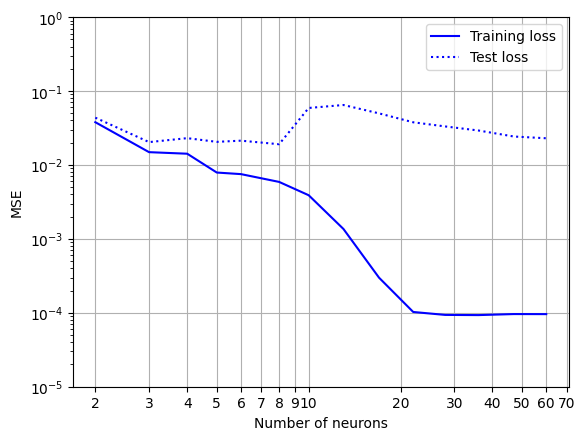

In [5]:
plt.loglog(Mvalues, losses[:,0], 'b-')
plt.loglog(Mvalues, losses[:,1], 'b:')
plt.legend(['Training loss', 'Test loss'])
plt.grid()
ax = plt.gca(); ax.set_ylim([10**(-5),10**(0)])
ax.set_ylabel("MSE")
ax.set_xlabel("Number of neurons")
# Customize x-axis to show more detailed labels
from matplotlib.ticker import LogLocator, ScalarFormatter
ax.xaxis.set_major_locator(LogLocator(base=10.0, subs=np.arange(1, 10)))
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.show()

##### c) Having more data can hurt

Show that increasing the amount of data helps when around the interpolation threshold, but that for overparameterized model it may hurt.

In [6]:
# Generate the larger training set, using the same process as before
N_large = 500
x_large = torch.randn(N_large, D)
y_large = modelGenerate(x_large).clone().detach() + noiselevel*torch.randn(N_large, O)

# TODO: Identify two values of M you need to answer the question
Mvalues = [10, 60]

# TODO: Repeat the training process for those options. Note that you can use the same code as before, 
# since you only changed the data and the set of M
data_loader = DataLoader(TensorDataset(x_large, y_large), batch_size=B, shuffle=True)
x_large_losses = np.zeros((len(Mvalues),2))
for M_index, M in enumerate(Mvalues):
	# TODO: Define the model
	model = RegressionModel(D, O, M)
	# TODO: Train it until convergence
	model.train()
	lr = 0.009
	optimizer = torch.optim.Adam(model.parameters(), lr=lr)
	num_epochs = 5000
	printing_interval = num_epochs // 10
	criterion = nn.MSELoss()
	for epoch in range(num_epochs):
		running_loss = 0.0
		for batch, (X, target_y) in enumerate(data_loader):
			optimizer.zero_grad()
			loss = criterion(model(X), target_y)
			loss.backward()
			optimizer.step()
			running_loss += loss.item()
		avg_loss = running_loss / len(data_loader)
		if(epoch % printing_interval == 0):
			print(f"Model complexity[{M}/{max(Mvalues)}] - Epoch [{epoch+1}/{num_epochs}] - MSE Loss: {avg_loss:.6f}")
		if avg_loss < 0.0001: break
	# TODO: Evaluate both training and test error, and store them
	model.eval()
	with torch.no_grad():
		train_predictions = model(x)
		trainloss = criterion(train_predictions, y)

		test_predictions = model(x_test)
		testloss = criterion(test_predictions, y_test)
	x_large_losses[M_index,0] = trainloss.item()
	x_large_losses[M_index,1] = testloss.item()
print("Test losses")
# TODO
for M_idx, M in enumerate(Mvalues):
	print(f"Model params: {M}, train loss: {x_large_losses[M_idx, 0]}, test loss: {x_large_losses[M_idx, 1]}")

Model complexity[10/60] - Epoch [1/5000] - MSE Loss: 0.123761
Model complexity[10/60] - Epoch [501/5000] - MSE Loss: 0.009680
Model complexity[10/60] - Epoch [1001/5000] - MSE Loss: 0.009480
Model complexity[10/60] - Epoch [1501/5000] - MSE Loss: 0.009462
Model complexity[10/60] - Epoch [2001/5000] - MSE Loss: 0.009286
Model complexity[10/60] - Epoch [2501/5000] - MSE Loss: 0.009316
Model complexity[10/60] - Epoch [3001/5000] - MSE Loss: 0.009211
Model complexity[10/60] - Epoch [3501/5000] - MSE Loss: 0.009297
Model complexity[10/60] - Epoch [4001/5000] - MSE Loss: 0.009264
Model complexity[10/60] - Epoch [4501/5000] - MSE Loss: 0.009159
Model complexity[60/60] - Epoch [1/5000] - MSE Loss: 0.094308
Model complexity[60/60] - Epoch [501/5000] - MSE Loss: 0.001108
Model complexity[60/60] - Epoch [1001/5000] - MSE Loss: 0.000863
Model complexity[60/60] - Epoch [1501/5000] - MSE Loss: 0.000528
Model complexity[60/60] - Epoch [2001/5000] - MSE Loss: 0.000522
Model complexity[60/60] - Epoch [

#### Reporting

**Edit this cell directly to report the requested information.**

##### Interpolation threshold

The interpolation threshold is around M = 10

For that M, the model has in total D * M + M * M + M * O = 10 * 10 + 10 * 10 + 10 * 5 = 250 parameters. Since the model is not disabling bias addition the final result is (D * M + M) + (M * M + M) + (M * O + O) = 275 parameters

Explain the findings. Do you observe the expected pattern? If not, what might have been a problem? The interpolation treshold is around the 10 neuron mark, where the input size equals the network size. As we see in the plot the further the complexity goes the lower the test error, implitying that the double descent phenomenon works. The pattern observed in the plot is the expected one, in other words the interpolation treshold is around where the size of the network exceeds the input size.

##### More data can hurt

TODO: Explain your choices of M values, report the test errors for the different amounts of training data, and explain the findings.
The chosen values of M are 10 and 60, since both values have previously been analyzed. The test errors for the 10 model are 0.0590161569416523 for 100 dataset size and 0.012940410524606705 for 500 dataset size. Since 10 is around the treshold we can see that more data in fact does help decrease the test error. On the other hand the test errors for the 60 model are 0.022971013560891151 for 100 dataset size and 0.03133542835712433 for 500 dataset size. We can in fact notice that if we increase the dataset size we do not obtain the benefits of a decreased test error, as expected.

In [7]:
torch.set_printoptions(sci_mode=False)
print(f"N = 100, model complexity: {10}, test error: {losses[6, 1]}")
print(f"N = 100, model complexity: {60}, test error: {losses[-1, 1]:.18f}")
print(f"N = 500, model complexity: {10}, test error: {x_large_losses[0, 1]}")
print(f"N = 500, model complexity: {60}, test error: {x_large_losses[1, 1]}")
torch.set_printoptions(sci_mode=True)

N = 100, model complexity: 10, test error: 0.0590161569416523
N = 100, model complexity: 60, test error: 0.022971013560891151
N = 500, model complexity: 10, test error: 0.012940410524606705
N = 500, model complexity: 60, test error: 0.03133542835712433
